In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!cp "/content/drive/My Drive/Datasets/Residual_bca.csv" "res.csv"
!cp "/content/drive/My Drive/Datasets/res_test.csv" "res_test.csv"
!cp "/content/drive/My Drive/Datasets/bbca_skripsi.csv" "bbca.csv"

In [3]:
from keras.layers import LSTM, Dense
from keras.models import Sequential
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
tf.__version__

'2.6.0'

In [5]:
saham = pd.read_csv("bbca.csv")
saham = np.array(saham)

In [6]:
res_train = pd.read_csv("res.csv")
res_train = np.array(res_train)

In [7]:
res_test = pd.read_csv("res_test.csv")
res_test = np.array(res_test)

In [8]:
def scaler(x):
  newx = (x-min(x))/(max(x)-min(x))
  return newx

def buat_timelag(data, lag):
  x = np.zeros(shape = (len(data) - lag, lag))
  y = np.zeros(shape = len(data)-lag)
  for i in range(len(data)-lag):
    x[i] = np.array([x for x in data[i:i+lag]])
    y[i] = np.array([data[i+lag]])
  return x, y

In [10]:
scaled_res_train = scaler(res_train)
x_res_train, y_res_train = buat_timelag(scaled_res_train.reshape(1188), 4)
x_res_train_rnn = np.reshape(x_res_train, (x_res_train.shape[0], x_res_train.shape[1], 1))
print(x_res_train_rnn.shape, y_res_train.shape)

(1184, 4, 1) (1184,)


In [11]:
model_fix = Sequential()
model_fix.add(LSTM(units = 50, batch_input_shape = (1, x_res_train_rnn.shape[1], 1)))
model_fix.add(Dense(units = 4, activation="relu"))
model_fix.add(Dense(units = 1))
model_fix.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, 50)                   10400     
_________________________________________________________________
dense (Dense)                (1, 4)                    204       
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    5         
Total params: 10,609
Trainable params: 10,609
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_fix.compile(loss = "mse", optimizer = "adam", metrics = "mae")

In [ ]:
history = model_fix.fit(x_res_train_rnn, y_res_train, batch_size = 1, epochs = 400)

In [15]:
model_fix.save("model_lstm.h5")

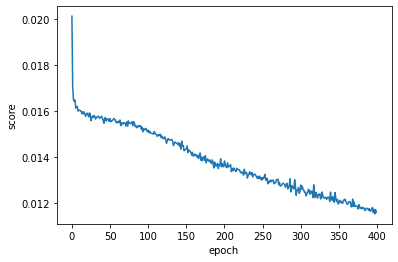

In [16]:
plt.plot(history.history['loss'], label = "mse")
plt.ylabel('score')
plt.xlabel('epoch')
plt.show()

In [17]:
prediction = model_fix.predict(x_res_train_rnn)

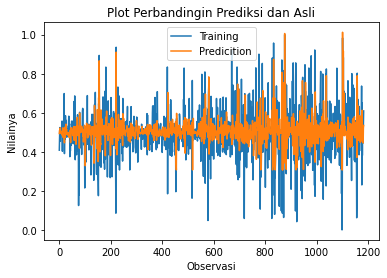

In [18]:
#LSTM
xaxis = range(x_res_train_rnn.shape[0])
plt.plot(xaxis, y_res_train, label = "Training")
plt.plot(xaxis, prediction, label = "Predicition")
plt.xlabel("Observasi")
plt.ylabel("Nilainya")
plt.title("Plot Perbandingin Prediksi dan Asli")
plt.legend()
plt.show()